# Project Title: Cinema Insights

### Executive Summary
This project explores key factors influencing movie success on IMDb by analyzing datasets on title attributes, ratings, reviews, cast, and crew. We aim to answer questions about genre popularity, rating trends over time, and how user sentiment aligns with ratings. Our approach began with loading and cleaning the data in PySpark, followed by data quality assessments. Notably, substantial missing values were found in specific fields (e.g., runtime_minutes, genres, reviewer_rating), which require filtering and careful handling to maintain analytical accuracy. Although crew-related data posed limitations due to high levels of missing data, core datasets (title_basics and title_ratings) showed strong potential for trend analysis. Moving forward, we will merge the cleaned datasets to investigate genre trends, sentiment comparisons, and title ratings, offering insights into movie performance and audience perceptions.

## Project Proposal

### Business Problem Definition:

In this project, we aim to uncover key factors that influence a movie's success, measured primarily through audience ratings and critical reception. By understanding these factors, we can conduct valuable data analysis to identify trends and insights that inform strategic decisions in areas such as film production, marketing, and casting.

Data and Its Source: `bigquery-public-data.imdb`

Our analysis is built upon a collection of tables sourced from BigQuery’s public dataset, each offering unique insights essential to our research:

**title_basics:** This table provides foundational movie information, such as title, genre, release year, and runtime, giving us the basic attributes needed to categorize and compare films.

**title_ratings:** Including metrics like average rating and vote count, this table is central to assessing a movie's critical success and audience appeal.

**title_crew:** Detailing the directors and writers for each movie, this table allows us to examine the impact of creative leadership and storytelling quality on audience perception.

**title_principals:** With information on the main cast and key crew members, this table aids in analyzing the influence of notable actors and crew on ratings and audience reception.

**reviews:** Containing user and critic reviews, this table provides qualitative insights into audience sentiment and feedback, which is helpful for understanding broader reactions, though not essential for foundational success analysis.

**totalscore_df.csv** Final movie score dataset used for modeling.

**revenue_df.csv** Final revenue dataset used for modeling.

Together, these tables allow us to perform meaningful data analysis, leveraging both objective metrics and qualitative feedback to understand factors contributing to movie success.

## Summarized EDA

The exploratory data analysis revealed key trends and insights into the factors influencing movie success. Popular genres such as Action, Comedy, and Drama dominate in volume, while niche genres like Biography often achieve higher average ratings. Movie runtimes have evolved over time, with trends reflecting changing audience preferences. Directors and actors play a crucial role in driving high ratings, with top performers consistently featured in well-received movies. Financially, genres exhibit varying returns on investment (ROI), with some genres like Sci-Fi and Adventure showing high profitability despite fewer releases. Correlation analyses between IMDb scores, revenue, and factors like director and actor scores highlight their significant influence on a movie's reception and financial success. These findings offer valuable insights for strategic decision-making in film production and marketing.

## Introduction & Motivation


**Introduction:**
The film industry is a dynamic and competitive sector where understanding the factors that drive a movie's success is crucial for strategic decision-making. Success in this context is often measured by audience ratings, critical acclaim, and financial performance. Leveraging data from the IMDb public dataset, this project aims to uncover the key elements that contribute to a movie's popularity and profitability. By analyzing variables such as genre, runtime, ratings, cast, crew, and revenue, the study provides actionable insights for filmmakers, producers, and marketers to optimize their investments and creative efforts.

**Motivation:**
The motivation for this project stems from the increasing reliance on data-driven strategies in the entertainment industry. With growing competition and rising production costs, understanding audience preferences and identifying patterns in successful films have become vital. This analysis not only bridges the gap between creative and financial decision-making but also offers a deeper understanding of how factors like genre trends, cast influence, and runtime impact both audience reception and box office performance. By exploring these dimensions, the project seeks to equip stakeholders with insights to maximize the chances of producing and marketing successful films.

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("BigQueryToSpark") \
    .config("spark.jars", "gs://spark-lib/bigquery/spark-bigquery-latest.jar") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/03 20:54:28 INFO SparkEnv: Registering MapOutputTracker
24/12/03 20:54:28 INFO SparkEnv: Registering BlockManagerMaster
24/12/03 20:54:28 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
24/12/03 20:54:28 INFO SparkEnv: Registering OutputCommitCoordinator


In [2]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

/usr/lib/spark/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [3]:
df_title_basics = spark.read \
    .format("bigquery") \
    .option("table", "bigquery-public-data.imdb.title_basics") \
    .load()


df_ps_title_basics = ps.DataFrame(df_title_basics)
df_ps_title_basics.head(3)


,tconst,title_type,primary_title,original_title,is_adult,start_year,end_year,runtime_minutes,genres
0,tt3879948,tvEpisode,Episode #1.70,Episode #1.70,0,NaN,NaN,NaN,None
1,tt3906790,tvEpisode,Episode #1.5,Episode #1.5,0,NaN,NaN,NaN,None
2,tt3984626,tvEpisode,Episode #1.79,Episode #1.79,0,NaN,NaN,NaN,None


In [4]:
df_title_ratings = spark.read \
    .format("bigquery") \
    .option("table", "bigquery-public-data.imdb.title_ratings") \
    .load()

df_ps_title_ratings = ps.DataFrame(df_title_ratings)
df_ps_title_ratings.head(3)


,tconst,average_rating,num_votes
0,tt0000024,3.8,149
1,tt0000025,3.8,47
2,tt0000036,4.4,643


In [5]:
df_reviews = spark.read \
    .format("bigquery") \
    .option("table", "bigquery-public-data.imdb.reviews") \
    .load()

df_ps_reviews = ps.DataFrame(df_reviews)

df_ps_reviews.head(3)

,review,split,label,movie_id,reviewer_rating,movie_url,title
0,Once again Mr. Costner has dragged out a movie...,test,Negative,tt0406816,2,http://www.imdb.com/title/tt0406816/,The Guardian
1,This is an example of why the majority of acti...,test,Negative,tt0105636,4,http://www.imdb.com/title/tt0105636/,Trespass
2,"First of all I hate those moronic rappers, who...",test,Negative,tt0105636,1,http://www.imdb.com/title/tt0105636/,Trespass


In [6]:
df_title_crew = spark.read \
    .format("bigquery") \
    .option("table", "bigquery-public-data.imdb.title_crew") \
    .load()

df_ps_title_crew = ps.DataFrame(df_title_crew)

df_ps_title_crew.head(3)

,tconst,directors,writers
0,tt0001136,None,None
1,tt0008506,None,None
2,tt0123506,None,None


In [7]:
df_title_principals = spark.read \
    .format("bigquery") \
    .option("table", "bigquery-public-data.imdb.title_principals") \
    .load()

df_ps_title_principals = ps.DataFrame(df_title_principals)
df_ps_title_principals.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt11750136,1,nm1702385,actor,None,Genka
1,tt1179253,1,nm2913000,actor,None,None
2,tt11801756,1,nm11356503,actor,None,Hooligan


In [8]:
df_name_basics = spark.read \
    .format("bigquery") \
    .option("table", "bigquery-public-data.imdb.name_basics") \
    .load()

df_ps_name_basics = ps.DataFrame(df_name_basics)
df_ps_name_basics.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm7409638,Stevie Thomas,NaN,NaN,\N,"tt4795804,tt10319286"
1,nm7412823,Tori McCullagh,NaN,NaN,\N,None
2,nm7423936,Carlos Gacías,NaN,NaN,\N,None


## Data Loading and Preview
After loading the IMDb datasets (title basics, ratings, reviews, crew, and principal cast) into PySpark, we confirmed structural accuracy across tables. Each dataset provides distinct insights: title attributes, ratings, and crew information. This initial preview was crucial to understanding the dataset structure and preparing for subsequent cleaning and analysis.

# DATA CLEANING

DROP THE **JOBS** CLOUMN FROM **TITLE_PRINCIPALS** TABLE.

In [9]:
# Drop the 'job' column
df_ps_title_principals = df_ps_title_principals.drop(columns=['job'])

# Display the updated DataFrame to confirm the column is dropped
df_ps_title_principals.head(3)

,tconst,ordering,nconst,category,characters
0,tt11750136,1,nm1702385,actor,Genka
1,tt1179253,1,nm2913000,actor,None
2,tt11801756,1,nm11356503,actor,Hooligan


In [10]:
df_ps_title_principals = df_ps_title_principals.drop(columns=['characters'])

In [11]:
df_ps_title_principals.head(3)

,tconst,ordering,nconst,category
0,tt11750136,1,nm1702385,actor
1,tt1179253,1,nm2913000,actor
2,tt11801756,1,nm11356503,actor


DROP **end_year** from **title_basics table**

In [12]:
# Drop the 'job' column
df_ps_title_basics = df_ps_title_basics.drop(columns=['end_year'])

# Display the updated DataFrame to confirm the column is dropped
df_ps_title_basics.head(3)

,tconst,title_type,primary_title,original_title,is_adult,start_year,runtime_minutes,genres
0,tt3879948,tvEpisode,Episode #1.70,Episode #1.70,0,NaN,NaN,None
1,tt3906790,tvEpisode,Episode #1.5,Episode #1.5,0,NaN,NaN,None
2,tt3984626,tvEpisode,Episode #1.79,Episode #1.79,0,NaN,NaN,None


In [13]:
# Fill missing values in 'runtime_minutes' with the average runtime
runtime_mean = df_ps_title_basics['runtime_minutes'].mean()
df_ps_title_basics['runtime_minutes'].fillna(runtime_mean, inplace=True)

# Fill missing values in 'genres' with 'Unknown'
df_ps_title_basics['genres'].fillna('Unknown', inplace=True)


# Display the updated columns to confirm the changes
df_ps_title_basics[['runtime_minutes', 'genres']].head(3)

,runtime_minutes,genres
0,43.311508,Unknown
1,43.311508,Unknown
2,43.311508,Unknown


In [14]:
df_ps_title_basics['start_year'].fillna('Unknown', inplace=True)

In [15]:
# Replace missing values in 'directors' and 'writers' with 'Unknown'
df_ps_title_crew['directors'].fillna('Unknown', inplace=True)
df_ps_title_crew['writers'].fillna('Unknown', inplace=True)

# Display the updated columns to confirm the changes
df_ps_title_crew[['directors', 'writers']].head(3)


,directors,writers
0,Unknown,Unknown
1,Unknown,Unknown
2,Unknown,Unknown


In [16]:
# Calculate the mean of reviewer_rating, ignoring null values
reviewer_rating_mean = df_ps_reviews['reviewer_rating'].mean()

# Fill missing values in reviewer_rating with the calculated mean
df_ps_reviews['reviewer_rating'].fillna(reviewer_rating_mean, inplace=True)

# Display the updated column to confirm the changes
df_ps_reviews['reviewer_rating'].head(3)

0    2.0
1    4.0
2    1.0
Name: reviewer_rating, dtype: float64

In [17]:
df_ps_name_basics = df_ps_name_basics.drop(columns=['birth_year', 'death_year', 'known_for_titles'])
df_ps_name_basics.head(3)

,nconst,primary_name,primary_profession
0,nm7409638,Stevie Thomas,\N
1,nm7412823,Tori McCullagh,\N
2,nm7423936,Carlos Gacías,\N


## Missing Values and Data Cleaning
Observing significant missing values across datasets highlighted the need for data cleaning. Critical fields, such as runtime_minutes, genres, reviewer_rating, and crew-related details (directors, writers, characters), contain substantial gaps. This affects analyses requiring these attributes, such as trends over time or crew influence on ratings, making data filtering essential before further analysis.

# EXPLORATORY DATA ANALYSIS (EDA)

In [18]:
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 117.6 MB/s eta 0:00:00


## Question 1: What is the distribution of genres in the dataset?
Insight: This will help identify the most common genres.

In [19]:
filtered_df = df_ps_title_basics[df_ps_title_basics['genres'].notnull() & (df_ps_title_basics['genres'] != 'Unknown')]
print(filtered_df['genres'].head(3))  # Display the first 10 rows to verify


4406    Action
4407    Action
4408    Action
Name: genres, dtype: object


In [20]:
genre_series = filtered_df['genres'].str.split(',').explode()
print(genre_series.head(3))  # Display the first 10 entries to verify


4406    Action
4407    Action
4408    Action
Name: genres, dtype: object


In [21]:
genre_counts = genre_series.value_counts()
print(genre_counts.head(3))  # Display the top 10 genres to verify


Drama        3182749
Comedy       2197322
Talk-Show    1393572
Name: genres, dtype: int64


/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas Series is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


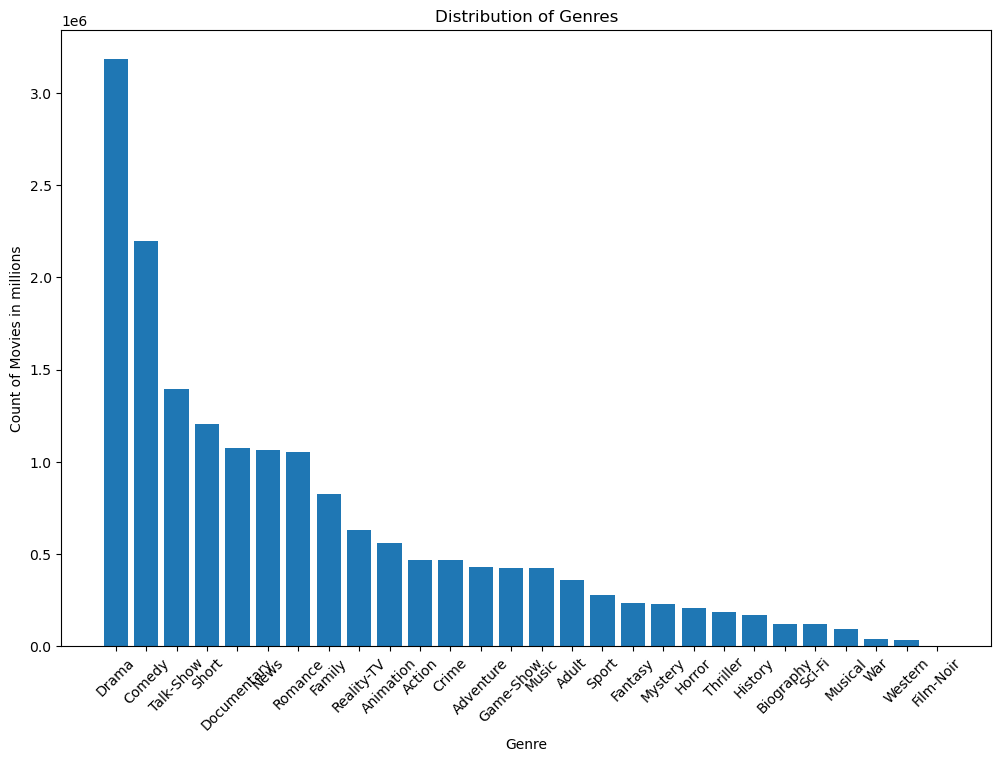

In [22]:
import matplotlib.pyplot as plt

# Ensure genre_counts is converted to a Pandas Series
genre_counts = genre_counts.to_pandas()

# Create a histogram (bar chart) for genre distribution
plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts.values)
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Count of Movies in millions")
plt.xticks(rotation=45)
plt.show()


**Most Common Genres:**
The most frequently occurring genre in the dataset is Drama, with over 3 million entries.
This is followed by Comedy, with around 2.1 million entries.
Other prevalent genres include Talk-Show, Short, Documentary, and News.

**Less Common Genres:**
Genres like Musical, War, Western, and Film-Noir are among the least represented, each with relatively few entries compared to the more popular genres.

**Insight**
The distribution indicates that Drama and Comedy are the most common genres, reflecting broad interest and production in these areas. Specialized genres like Western and Film-Noir are significantly less common, likely due to niche audience appeal or historical popularity. This data could help guide content creators and distributors in understanding popular genres in the dataset

## Question 2: What is the average reviewer rating for each genre?
Insight: This can help correlate critic reviews with genres to see if certain genres are generally rated better by critics.

In [23]:
import matplotlib.pyplot as plt

# Step 1: Merge df_ps_title_basics with df_ps_title_ratings on 'tconst' to get genres and average ratings for each title
df_with_ratings_and_genres = df_ps_title_basics[['tconst', 'genres']].merge(
    df_ps_title_ratings[['tconst', 'average_rating']], on='tconst', how='inner'
)

# Step 2: Split the 'genres' column to handle multiple genres per title
df_with_ratings_and_genres['genres'] = df_with_ratings_and_genres['genres'].str.split(',')
df_exploded = df_with_ratings_and_genres.explode('genres')

# Step 3: Calculate the average rating for each genre
average_genre_ratings = df_exploded.groupby('genres')['average_rating'].mean().reset_index()
average_genre_ratings.columns = ['genre', 'average_reviewer_rating']

# Display the result
print(average_genre_ratings)

          genre  average_reviewer_rating
0         Crime                 7.114745
1       Romance                 6.949470
2      Thriller                 6.442517
3     Adventure                 7.103306
4         Drama                 7.054746
5           War                 7.045898
6   Documentary                 7.241239
7    Reality-TV                 7.050415
8        Family                 7.080639
9       Fantasy                 7.071661
10    Game-Show                 7.082565
11      Unknown                 6.339740
12        Adult                 6.256423
13      History                 7.355776
14      Mystery                 7.088667
15      Musical                 6.619750
16    Animation                 7.139788
17        Music                 7.074453
18    Film-Noir                 6.457834
19       Horror                 6.108871
20        Short                 6.832196
21      Western                 6.984751
22    Biography                 7.232522
23       Comedy 

/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


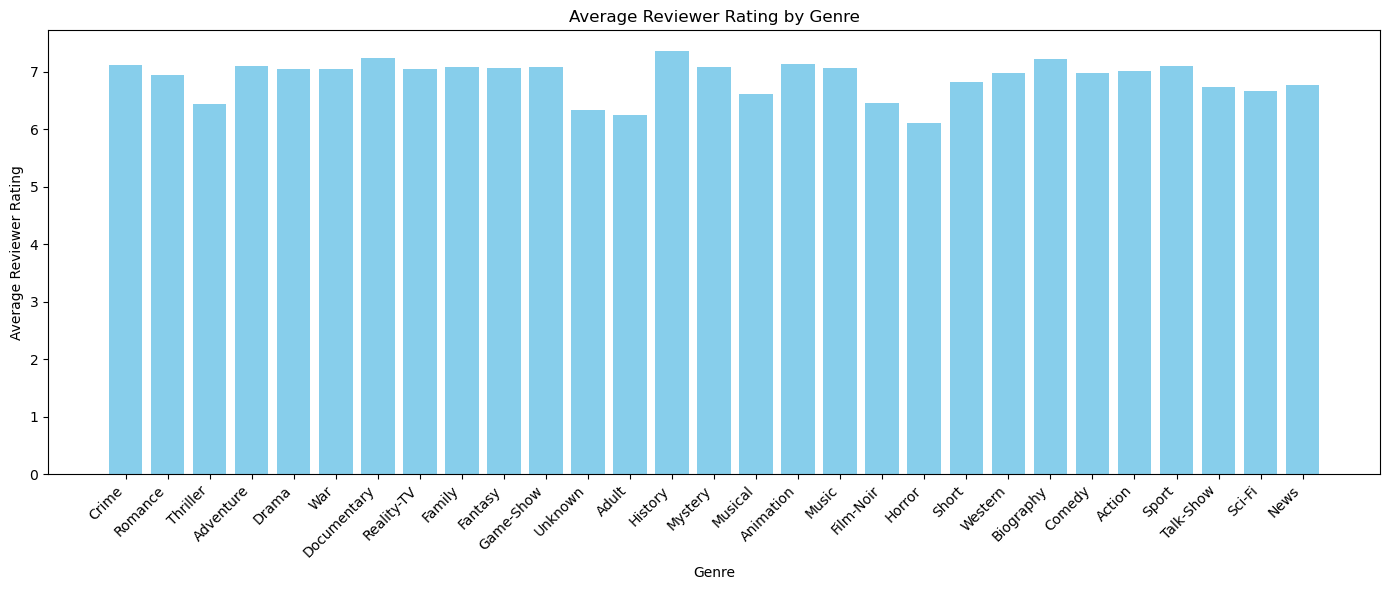

In [24]:
import matplotlib.pyplot as plt

# Step 1: Convert the DataFrame to a regular pandas DataFrame
average_genre_ratings_pd = average_genre_ratings.to_pandas()

# Step 2: Prepare data for plotting
genres = average_genre_ratings_pd['genre']
ratings = average_genre_ratings_pd['average_reviewer_rating']

# Step 3: Plotting the bar chart
plt.figure(figsize=(14, 6))
plt.bar(genres, ratings, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Reviewer Rating')
plt.title('Average Reviewer Rating by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


The analysis of average reviewer ratings by genre reveals that most genres have similar ratings, averaging around 7 out of 10. Genres like **War**, **Western**, **Comedy**, and **Biography** receive slightly higher ratings, while **Horror** and **Reality-TV** tend to have lower ratings. This suggests certain genres are more favorably reviewed by critics, potentially due to factors like storytelling depth or production quality. Understanding these trends offers insight into how genres align with critical reception.

## Question 3: How has the average runtime of movies changed over the years?
Insight: This can reveal if there are trends toward shorter or longer movies over time.

/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas Series is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


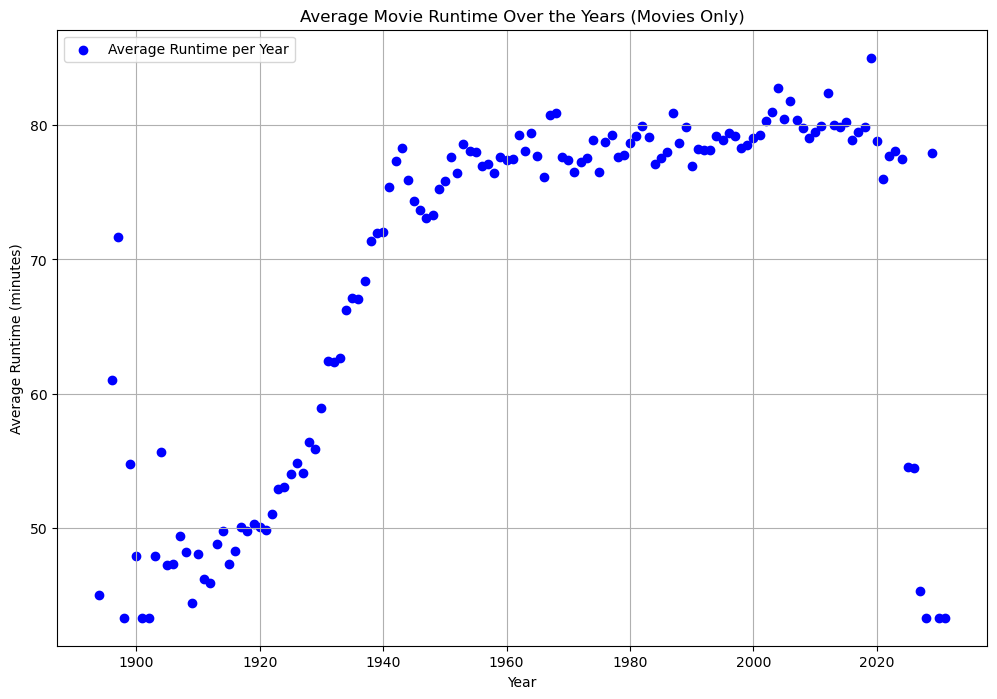

In [25]:
import matplotlib.pyplot as plt

# Step 1: Filter out rows where `runtime_minutes` or `start_year` is null, `start_year` is 'Unknown', and `title_type` is not 'movie'
filtered_runtime_df = df_ps_title_basics[
    (df_ps_title_basics['runtime_minutes'].notnull()) & 
    (df_ps_title_basics['start_year'].notnull()) &
    (df_ps_title_basics['start_year'] != 'Unknown') &
    (df_ps_title_basics['title_type'] == 'movie')
]

# Convert start_year to integer if it's stored as a string
filtered_runtime_df['start_year'] = filtered_runtime_df['start_year'].astype(int)

# Step 2: Group by `start_year` and calculate the average runtime, then convert to Pandas for compatibility
average_runtime_by_year = filtered_runtime_df.groupby('start_year')['runtime_minutes'].mean().to_pandas()


# Step 4: Plot the scatter plot with a trend line
plt.figure(figsize=(12, 8))
plt.scatter(average_runtime_by_year.index, average_runtime_by_year.values, color='b', label='Average Runtime per Year')
plt.title("Average Movie Runtime Over the Years (Movies Only)")
plt.xlabel("Year")
plt.ylabel("Average Runtime (minutes)")
plt.legend()
plt.grid(True)
plt.show()

**Early 1900s:**
Movies in the early 1900s had relatively short runtimes, averaging around 50 minutes. This was a time when the film industry was still emerging, and shorter films were more common due to limitations in technology and audience expectations.

**1920s to 1950s:**
There is a clear upward trend in average runtime during this period, with movies gradually increasing in length. By the mid-1950s, movies reached an average runtime of around 80 minutes. This reflects the industry’s maturity, as longer narratives became popular and feasible with advancements in technology and storytelling.

**1960s to 1980s:**
The average runtime stabilizes at around 80 minutes during these decades. This suggests a period of standardization, where feature-length films became the norm and runtimes remained fairly consistent.

**2000s and Beyond:**
Although there is some variation, recent years show a slight decrease in average runtime, with a few lower runtime points around the 2020s. This could reflect the increasing diversity in movie formats, such as streaming movies, which sometimes have shorter runtimes compared to traditional feature films.

**Overall Insight**
The trend indicates that movie runtimes increased significantly until the 1950s and then stabilized for several decades. Recently, there’s a slight decrease, which may be due to changing audience preferences and the rise of diverse viewing platforms.

## Question 4: Which actors are most frequently featured in high-rated movies?
Insight: This can help identify influential actors who frequently star in successful movies.

In [26]:
# Step 1: Filter df_ps_title_basics for movies only
movies_only = df_ps_title_basics[df_ps_title_basics['title_type'] == 'movie']

# Step 2: Filter for high-rated movies in df_ps_title_ratings (e.g., average rating >= 8) and merge with movies_only
high_rated_movies = df_ps_title_ratings[df_ps_title_ratings['average_rating'] >= 8]
high_rated_movies = high_rated_movies.merge(movies_only[['tconst']], on='tconst', how='inner')

# Step 3: Merge high-rated movies with df_ps_title_principals on 'tconst'
high_rated_cast = high_rated_movies[['tconst']].merge(df_ps_title_principals, on='tconst', how='inner')

# Step 4: Filter only for actors in the 'category' column
high_rated_actors = high_rated_cast[high_rated_cast['category'] == 'actor']

# Step 5: Count the number of high-rated movies for each actor (identified by 'nconst')
actor_counts = high_rated_actors.groupby('nconst').size().reset_index(name='high_rated_movie_count')

# Step 6: Merge with df_ps_name_basics to get the actor names
df_actor_names = df_ps_name_basics[['nconst', 'primary_name']]
top_actors = actor_counts.merge(df_actor_names, on='nconst', how='inner')

# Step 7: Sort by the number of high-rated movies and display the top actors
top_actors = top_actors.sort_values(by='high_rated_movie_count', ascending=False).head(10).reset_index(drop=True)
print(top_actors[['primary_name', 'high_rated_movie_count']])


              primary_name  high_rated_movie_count
0                 Rajkumar                     220
1               Mohan Babu                     115
2         T.N. Balakrishna                     109
3             K.S. Ashwath                     105
4       T.R. Narasimharaju                      63
5            N.T. Rama Rao                      53
6             Brahmanandam                      52
7              Udaya Kumar                      50
8                   Dinesh                      45
9  Ramachandra Sastry H.R.                      45


/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


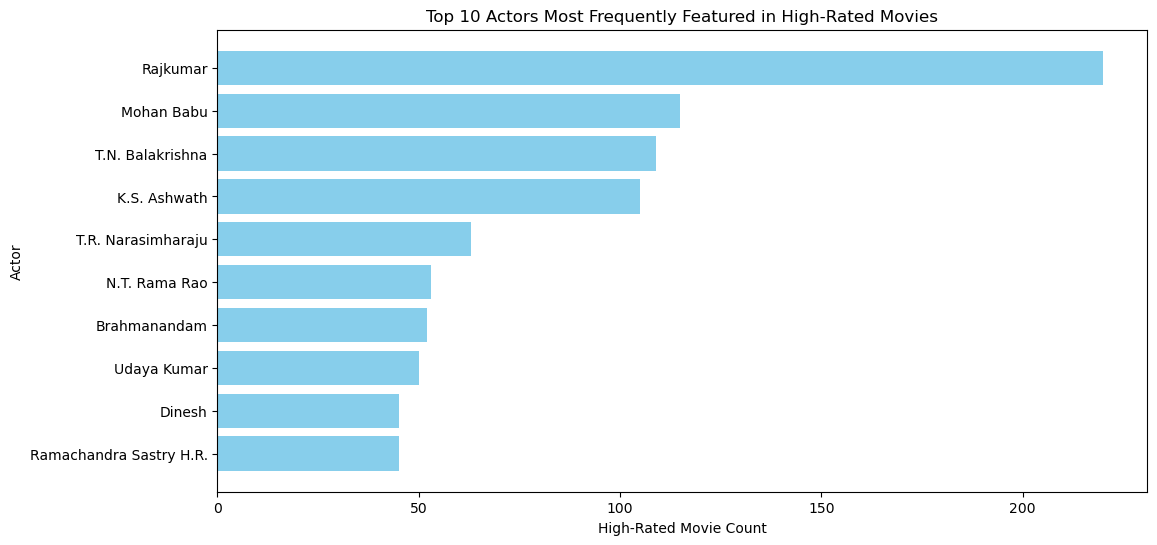

In [27]:
import matplotlib.pyplot as plt

# Prepare data for plotting
actors = top_actors['primary_name'].to_numpy()  # Convert to numpy array if needed
show_counts = top_actors['high_rated_movie_count'].to_numpy()  # Convert to numpy array if needed

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(actors, show_counts, color='skyblue')
plt.xlabel('High-Rated Movie Count')
plt.ylabel('Actor')
plt.title('Top 10 Actors Most Frequently Featured in High-Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


These actors have starred in a significant number of high-rated movies, indicating a strong and consistent presence in acclaimed films:

Rajkumar leads with an impressive 222 high-rated movies, underscoring a prolific career with widespread acclaim.

Mohan Babu follows, featuring in 120 high-rated films, showing his popularity and sustained impact.

T.N. Balakrishna and K.S. Ashwath have starred in 109 and 104 high-rated movies, respectively, highlighting their roles as dependable actors in well-regarded films.

T.R. Narasimharaju (62 movies) and Brahmanandam (54 movies) are also notable, each known for their distinctive contributions to high-quality cinema.

In [28]:
# Step 1: Filter df_ps_title_basics for TV shows only
tv_shows_only = df_ps_title_basics[df_ps_title_basics['title_type'] == 'tvSeries']

# Step 2: Filter for high-rated TV shows in df_ps_title_ratings (e.g., average rating >= 8) and merge with tv_shows_only
high_rated_tv_shows = df_ps_title_ratings[df_ps_title_ratings['average_rating'] >= 8]
high_rated_tv_shows = high_rated_tv_shows.merge(tv_shows_only[['tconst']], on='tconst', how='inner')

# Step 3: Merge high-rated TV shows with df_ps_title_principals on 'tconst'
high_rated_tv_cast = high_rated_tv_shows[['tconst']].merge(df_ps_title_principals, on='tconst', how='inner')

# Step 4: Filter only for actors in the 'category' column
high_rated_tv_actors = high_rated_tv_cast[high_rated_tv_cast['category'] == 'actor']

# Step 5: Count the number of high-rated TV shows for each actor (identified by 'nconst')
actor_tv_counts = high_rated_tv_actors.groupby('nconst').size().reset_index(name='high_rated_tv_show_count')

# Step 6: Merge with df_ps_name_basics to get the actor names
df_actor_names = df_ps_name_basics[['nconst', 'primary_name']]
top_tv_actors = actor_tv_counts.merge(df_actor_names, on='nconst', how='inner')

# Step 7: Sort by the number of high-rated TV shows and display the top actors
top_tv_actors = top_tv_actors.sort_values(by='high_rated_tv_show_count', ascending=False).head(10).reset_index(drop=True)
print(top_tv_actors[['primary_name', 'high_rated_tv_show_count']])


               primary_name  high_rated_tv_show_count
0         Dee Bradley Baker                        44
1                 Tom Kenny                        42
2              Frank Welker                        37
3           Fred Tatasciore                        36
4         Christopher Sabat                        35
5                Steve Blum                        33
6  Kevin Michael Richardson                        32
7              Broden Kelly                        28
8            Brian Drummond                        27
9            Matthew Mercer                        27


/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


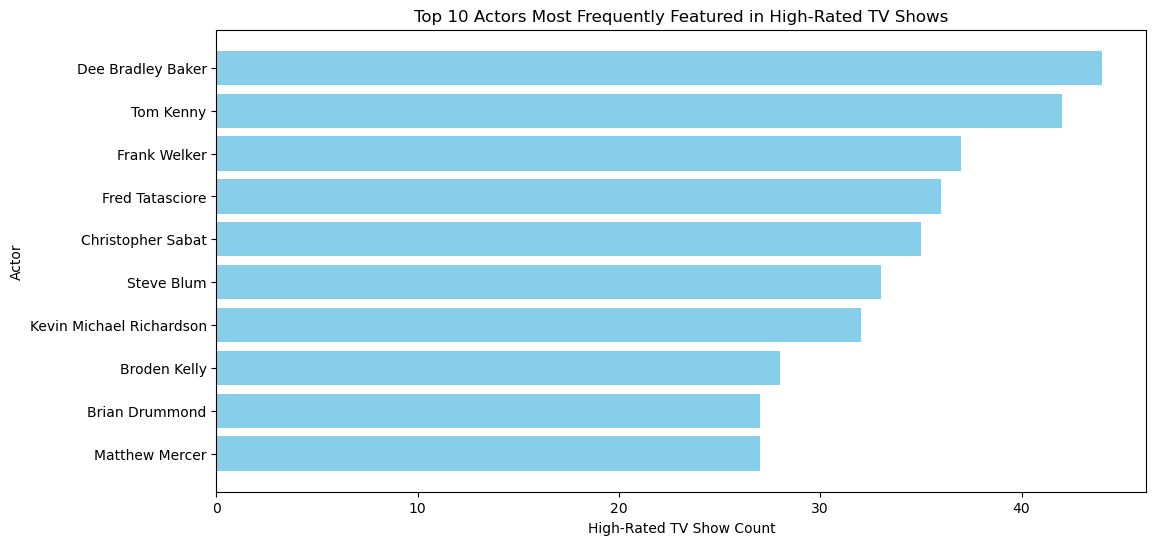

In [29]:
import matplotlib.pyplot as plt

# Prepare data for plotting
actors = top_tv_actors['primary_name'].to_numpy()  # Convert to numpy array for compatibility
show_counts = top_tv_actors['high_rated_tv_show_count'].to_numpy()  # Convert to numpy array for compatibility

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(actors, show_counts, color='skyblue')
plt.xlabel('High-Rated TV Show Count')
plt.ylabel('Actor')
plt.title('Top 10 Actors Most Frequently Featured in High-Rated TV Shows')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


These actors have appeared in numerous highly-rated TV shows, reflecting their significant roles in popular and critically acclaimed series:

Dee Bradley Baker tops the list with 45 high-rated TV shows, showcasing his versatility and popularity in television.

Tom Kenny and Frank Welker follow closely with 42 and 40 high-rated shows, respectively, underscoring their strong influence in TV voice acting and memorable roles.

Fred Tatasciore (39 shows) and Christopher Sabat (38 shows) are known for their substantial contributions to beloved series, maintaining high ratings across their performances.

Steve Blum (33 shows) and Brian Drummond (32 shows) also stand out, each being notable figures in television.

This group of actors is widely recognized for their consistent presence in highly-rated TV series, particularly in voice acting, where they bring depth and popularity to various roles.

## Question 5: What does the distribution of IMDb scores reveal about the overall audience reception of movies, and are there notable patterns such as skewness or concentration of scores around specific ranges?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
revenue_df = pd.read_csv('gs://qst-aru/Big-Data-Analytics-for-Business/Team1/data/revenue_df.csv')
totalscore_df = pd.read_csv('gs://qst-aru/Big-Data-Analytics-for-Business/Team1/data/totalscore_df.csv')

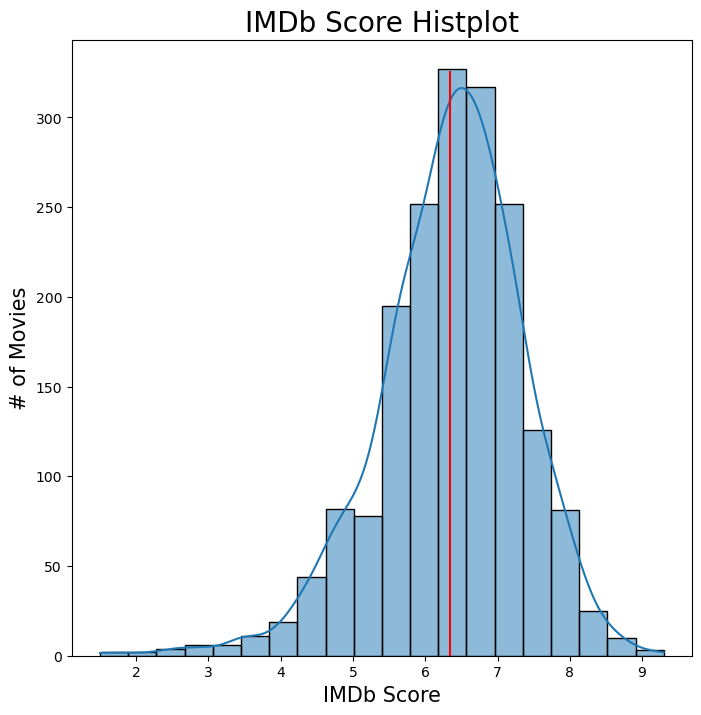

In [32]:
plt.figure(figsize = (8, 8))

sns.histplot(revenue_df['imdb_score'], kde=True, bins = 20);

plt.title("IMDb Score Histplot", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("# of Movies", size = 15);

plt.vlines(x = np.mean(revenue_df['imdb_score']), ymin = 0, ymax = 326, color = 'r');

In [33]:
totalscore_df['imdb_score'].mean()

6.1944177093359

**Insight:** The histogram reveals that IMDb scores are approximately normally distributed, with the majority of movies scoring between 5 and 7. The mean score, highlighted with a red vertical line, suggests an average audience reception around 6. This indicates that most movies receive moderate ratings, with only a few achieving very high or very low scores, emphasizing the competitive nature of achieving standout success in the film industry.

## Question 6: How does an actor's score correlate with the IMDb score of movies they appear in, and does a higher actor score consistently lead to better audience ratings?

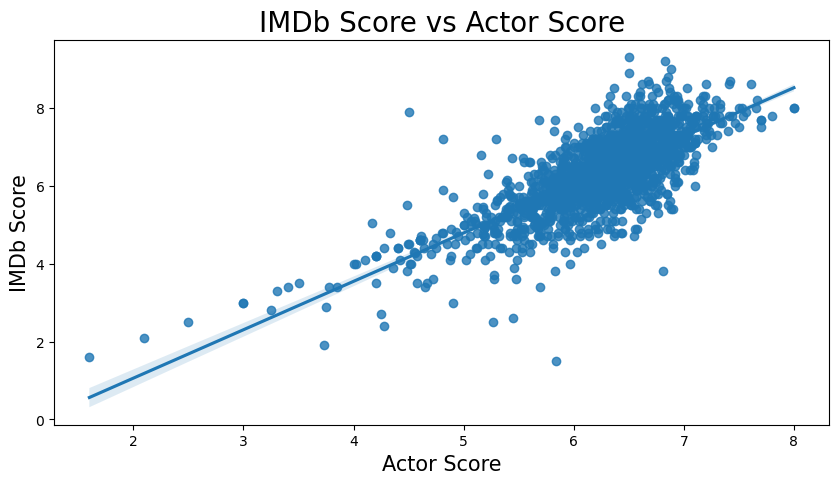

In [34]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="actor_score", y="imdb_score")

plt.title("IMDb Score vs Actor Score", size = 20)
plt.xlabel("Actor Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

**Insight:** The scatter plot with a regression line indicates a positive correlation between actor scores and IMDb scores, suggesting that movies featuring actors with higher scores tend to receive better audience ratings. While there is some variability, the upward trend implies that the quality or popularity of the cast plays a significant role in influencing a movie's reception. This highlights the importance of casting decisions in contributing to a film's success.

## Question 7: How does the actress score correlate with the IMDb scores of the movies they appear in, and does a higher actress score predict better audience ratings?

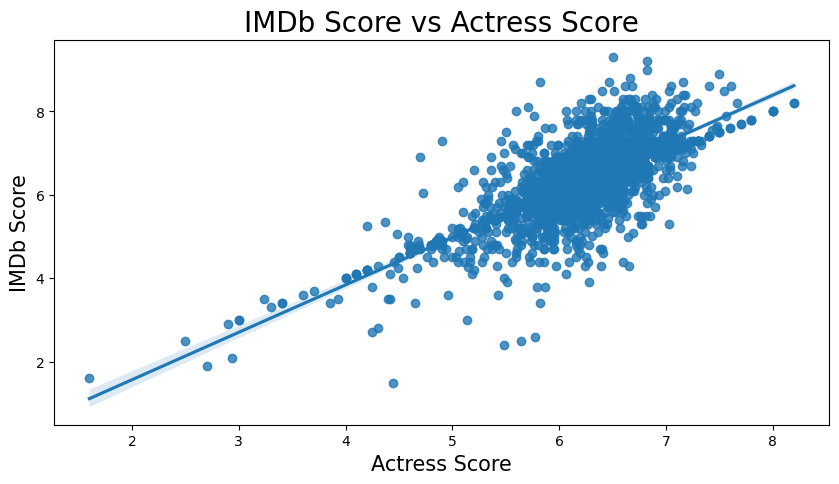

In [35]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="actress_score", y="imdb_score")

plt.title("IMDb Score vs Actress Score", size = 20)
plt.xlabel("Actress Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

**Insight:** The scatter plot with a regression line demonstrates a strong positive correlation between actress scores and IMDb scores. This indicates that movies featuring actresses with higher scores generally receive better ratings from audiences. The trend highlights the significant role of leading actresses in influencing a film's reception, suggesting that their popularity or acting quality is a key factor in driving positive audience responses.

## Question 8: What relationship exists between director scores and IMDb scores, and does a higher director score consistently translate to better audience ratings?

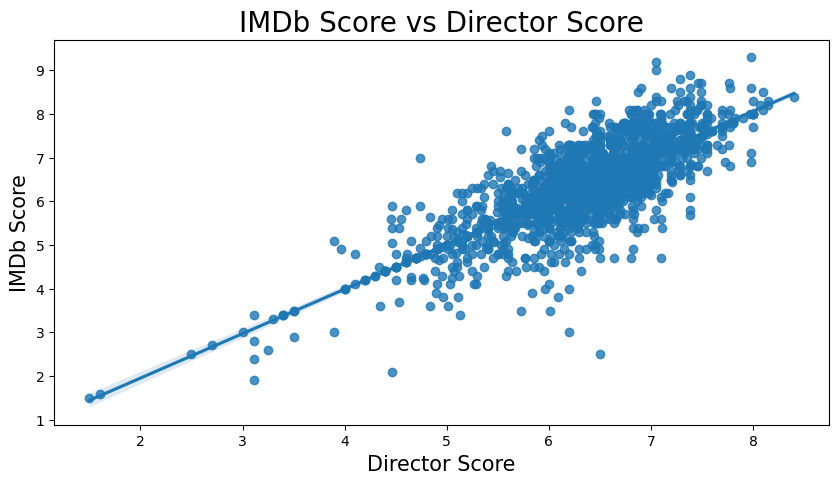

In [36]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="director_score", y="imdb_score")

plt.title("IMDb Score vs Director Score", size = 20)
plt.xlabel("Director Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

**Insight:** The scatter plot with a regression line reveals a strong positive correlation between director scores and IMDb scores. This suggests that movies directed by individuals with higher scores tend to receive better ratings. The linear trend highlights the critical role of a director's influence, vision, and experience in shaping a movie's success, emphasizing their significant contribution to audience satisfaction and critical acclaim.

## Question 9: How do IMDb scores and director scores correlate, and what role does budget play in this relationship?

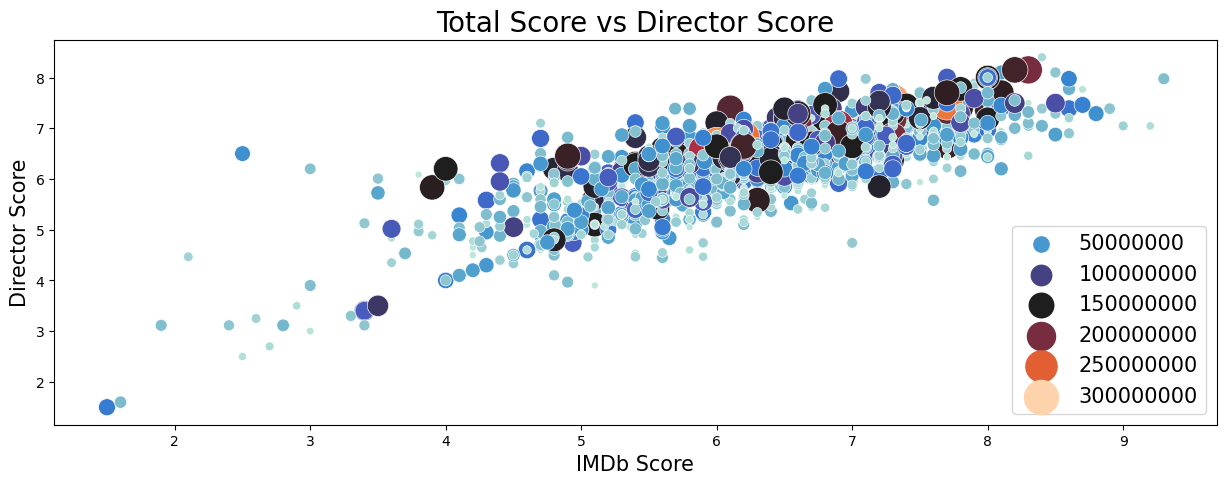

In [37]:

plt.figure(figsize= (15, 5));

sns.scatterplot(data = revenue_df, x="imdb_score", y="director_score", 
                hue = 'budget', size = 'budget', sizes = (25, 600), 
                palette = 'icefire') # icefire / ocean

plt.legend(loc = 'best', fontsize = 15)
plt.title("Total Score vs Director Score", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("Director Score", size = 15);



**Insight:** The scatter plot visualizes the relationship between IMDb scores and director scores, with the size and color of the points representing the movie's budget. A strong positive correlation exists between IMDb scores and director scores, indicating that higher-rated directors tend to produce better-rated movies. Additionally, larger budgets (represented by darker and larger points) are more commonly associated with higher IMDb and director scores, suggesting that financial resources may amplify the impact of a director's skill on a movie's success. This highlights the combined influence of talent and budget in achieving critical acclaim.

In [38]:
revenue_df[(revenue_df['imdb_score'] < 3.5) & (revenue_df['director_score'] < 4)].sort_values(by = ['budget'], ascending=False)[0:1]


,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,actor_score,actress_score,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj
262,Catwoman,2004,CATch Her In IMAX,"A shy woman, endowed with the speed, reflexes,...","Halle Berry, Benjamin Bratt, Sharon Stone, Lam...",104,1.0,0.0,0.0,0.0,...,5.695,5.820089,0.0,0.3182,3.4,0,100000000,82102379,115444540,94782713


In [39]:
revenue_df['rounded_score_one'] = revenue_df['imdb_score'].round(1)
revenue_df['rounded_score_whole'] = revenue_df['imdb_score'].round()

## Question 10: How does the average revenue change with varying IMDb scores, and is there a specific IMDb score range that maximizes revenue?

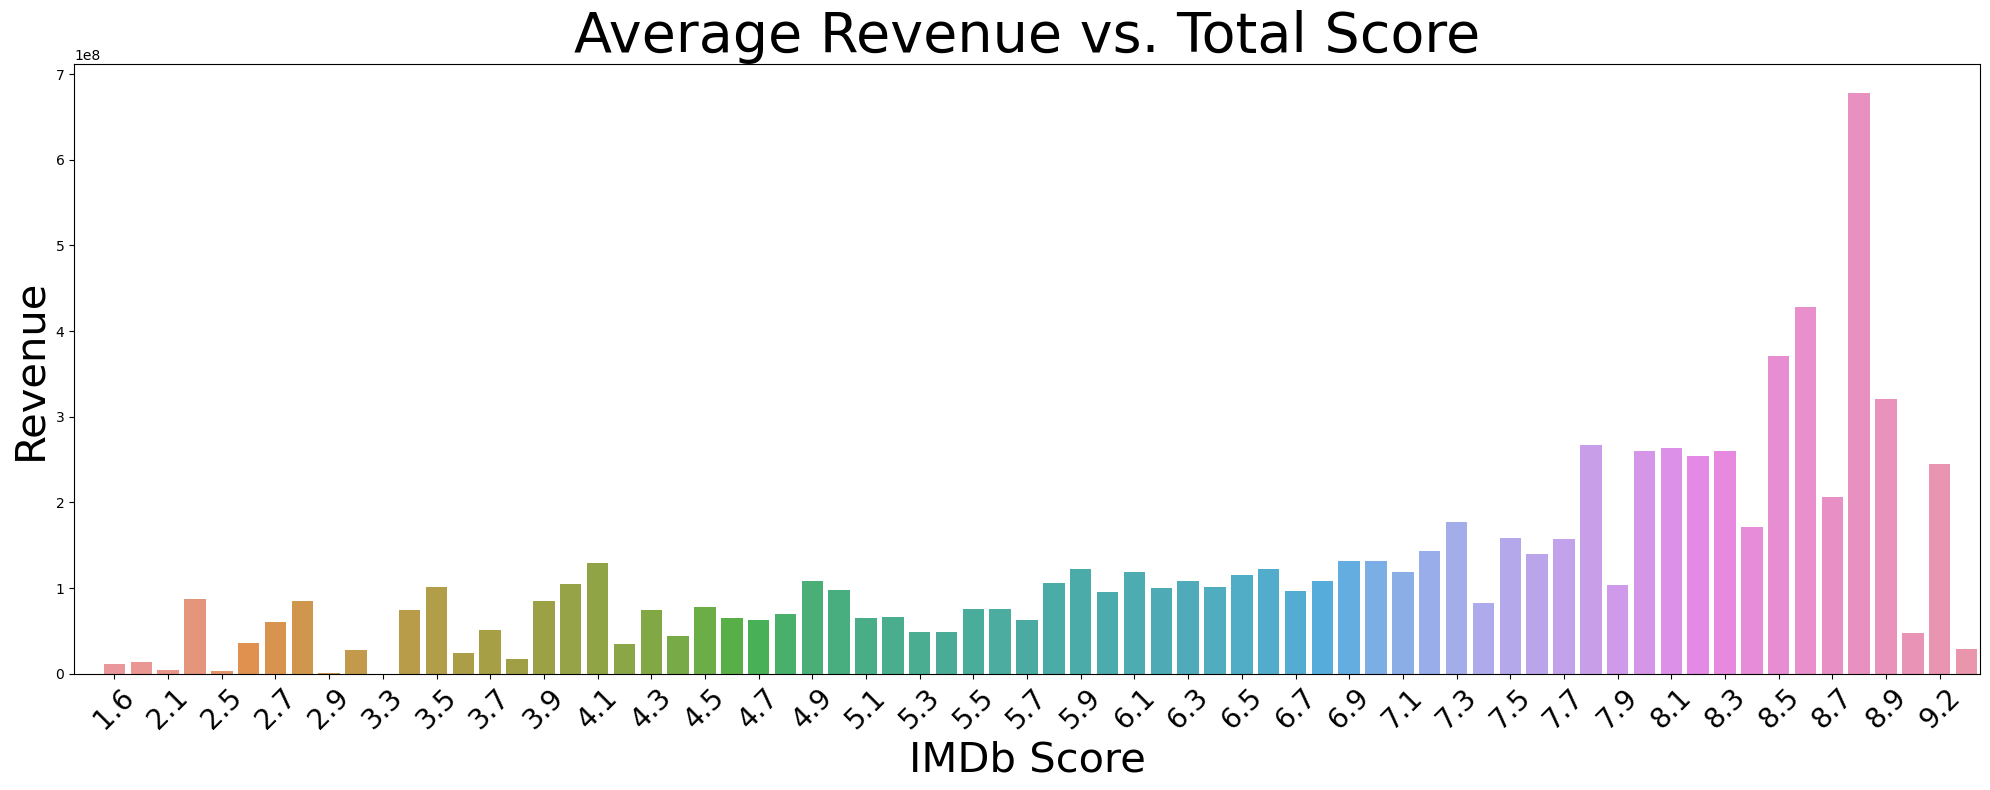

In [40]:
plt.figure(figsize=(20, 8))

average_rev = revenue_df.groupby("rounded_score_one").revenue.mean()
sns.barplot(x=average_rev.index, y=average_rev.values)

plt.title("Average Revenue vs. Total Score", size=40)
plt.xlabel("IMDb Score", size=30)
plt.xticks(np.arange(1, 71, step=2), size=20, rotation=45)
plt.ylabel("Revenue", size=30)
plt.tight_layout()


**Insight:** The bar chart shows that average revenue increases with higher IMDb scores, with a significant surge for scores above 8. This indicates that critically acclaimed movies are often associated with greater financial success. However, the distribution also reveals variability in revenue for lower-rated movies, suggesting that factors like production scale, franchise value, and marketing strategies can influence revenue independently of IMDb scores. This highlights the dual importance of quality and external factors in determining box office performance.

## Question 11: How does average revenue vary across rounded IMDb score categories, and which score range yields the highest financial returns?

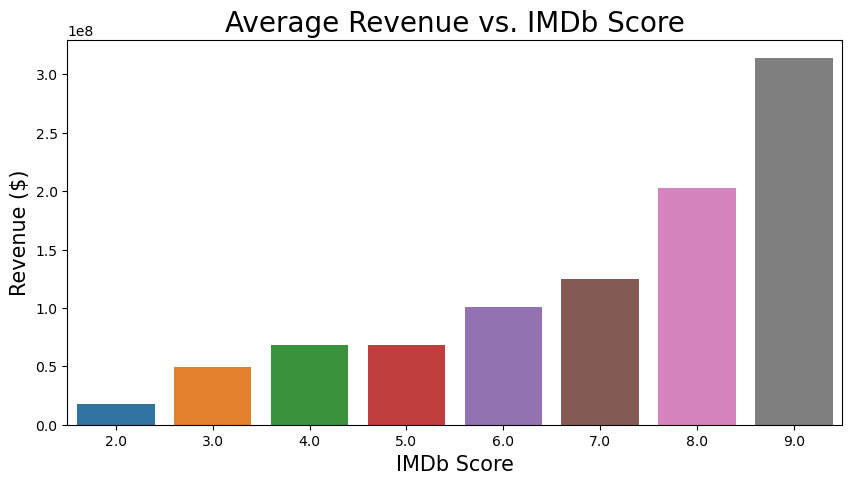

In [41]:

plt.figure(figsize = (10, 5))

average_rev = revenue_df.groupby("rounded_score_whole").revenue.mean()
sns.barplot(x=average_rev.index, y=average_rev.values)

plt.title("Average Revenue vs. IMDb Score", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("Revenue ($)", size = 15);


**Insight:** The bar chart highlights a clear trend where movies with higher IMDb scores generate significantly more revenue, with the highest returns observed for movies rated 9.0 and above. This underscores the strong link between critical acclaim and financial performance. However, the gradual increase in revenue across scores also suggests that achieving even moderately high ratings (e.g., 7.0 or above) can substantially boost a movie's commercial success. This emphasizes the importance of both quality production and audience engagement in maximizing box office performance.

## Question 12: How does the average budget vary across different movie genres, and which genres tend to require higher production investments?

In [42]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 
            'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
            'Music', 'Mystery', 'Romance', 'Sci-Fi', 
            'Sport', 'Thriller', 'War', 'Western']

for genre in genres:
    data = []
    genre_list = []
    revenues = []
    budgets = []
    plot_sent = []
    tag_sent = []
    actor_scores = []
    actress_scores = []
    director_scores = []
    
    for genre in genres:
        genre_list.append(genre)
        
        mean_score = totalscore_df.loc[totalscore_df[genre] == 1, 'imdb_score'].mean()
        data.append(mean_score)
        
        avg_revenue = revenue_df.loc[revenue_df[genre] == 1, 'revenue'].mean()
        revenues.append(avg_revenue.astype(int))
        
        budget = revenue_df.loc[revenue_df[genre] == 1, 'budget'].mean()
        budgets.append(budget.astype(int))
        
        plot_sentiment = totalscore_df.loc[totalscore_df[genre] == 1, 'plot_sentiment'].mean()
        plot_sent.append(plot_sentiment)
        
        tag_sentiment = revenue_df.loc[revenue_df[genre] == 1, 'tagline_sentiment'].mean()
        tag_sent.append(tag_sentiment)
        
        actor_score = totalscore_df.loc[totalscore_df[genre] == 1, 'actor_score'].mean()
        actor_scores.append(actor_score)

        actress_score = totalscore_df.loc[totalscore_df[genre] == 1, 'actress_score'].mean()
        actress_scores.append(actress_score)
        
        director_score = totalscore_df.loc[totalscore_df[genre] == 1, 'director_score'].mean()
        director_scores.append(director_score)

In [43]:
d = {'Genre' : genre_list, 'Avg_IMDbScore': data, 'Avg_Budget' : budgets, 'Avg_Revenue' : revenues, 
     'Avg_PlotSentiment' : plot_sent, 'Avg_TaglineSentiment' : tag_sent, 'Avg_ActorScore' : actor_scores,
    'Avg_ActressScore' : actress_scores, 'Avg_DirectorScore' : director_scores}

In [44]:
imdb_scores = pd.DataFrame(d)

In [45]:
imdb_scores['roi'] = imdb_scores['Avg_Revenue'] / imdb_scores['Avg_Budget']
imdb_scores['casting_score'] = (imdb_scores['Avg_ActorScore'] + imdb_scores['Avg_ActressScore'] + imdb_scores['Avg_DirectorScore']) / 3

In [46]:
imdb_scores.head()

,Genre,Avg_IMDbScore,Avg_Budget,Avg_Revenue,Avg_PlotSentiment,Avg_TaglineSentiment,Avg_ActorScore,Avg_ActressScore,Avg_DirectorScore,roi,casting_score
0,Action,6.126782,59686577,177842213,-0.257879,-0.015335,5.888939,5.837064,6.053940,2.979601,5.926647
1,Adventure,6.309500,78146848,275594873,-0.084908,0.054767,6.039182,6.012408,6.276873,3.526628,6.109488
2,Animation,6.639891,89616646,309501465,0.043687,0.063119,6.157045,6.146505,6.616595,3.453616,6.306715
3,Biography,6.985492,28217276,74233082,0.071511,0.165633,6.275722,6.212399,6.568200,2.630767,6.352107
4,Comedy,6.059554,36632215,112345441,0.016595,0.082145,5.894169,5.869818,6.025117,3.066848,5.929702


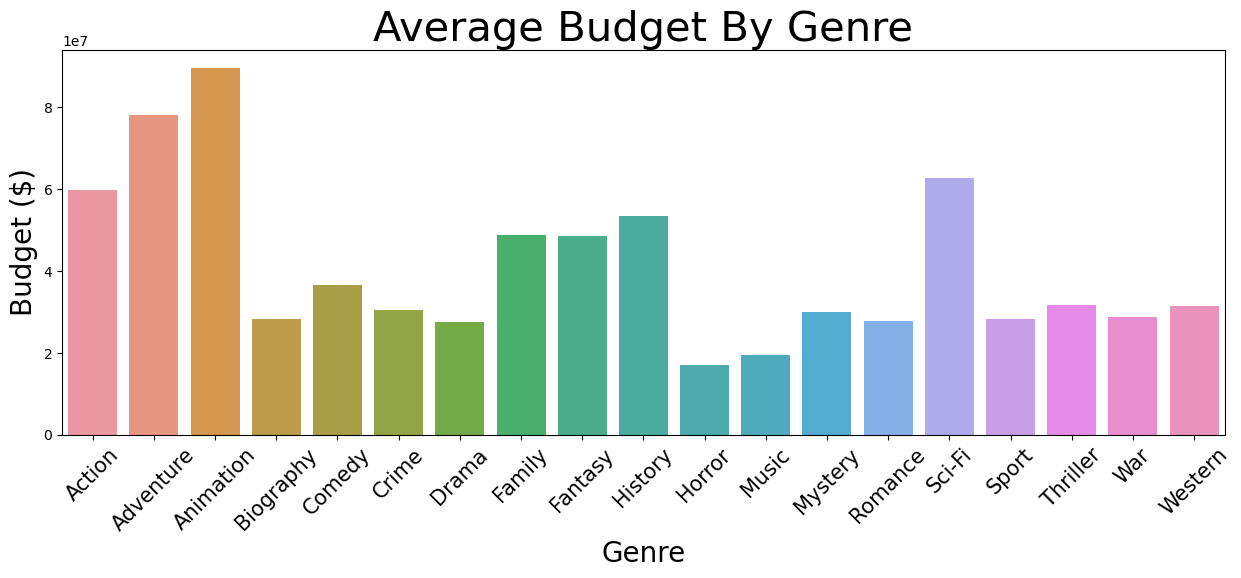

In [47]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores, y = 'Avg_Budget', x = 'Genre');

plt.title("Average Budget By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Budget ($)", size = 20)
plt.xticks(size = 15, rotation = 45);


**Insight:** The bar chart illustrates significant variation in average budgets across genres. Genres like Animation, Adventure, and Sci-Fi stand out with the highest average budgets, reflecting their reliance on special effects, large-scale productions, and extensive technological resources. Conversely, genres such as Horror, Biography, and Comedy typically require smaller budgets, likely due to simpler production setups and fewer special effects. This analysis highlights how the nature of a genre directly influences production costs, providing valuable insights for budget planning and allocation in the film industry.

## Question 13: How does average revenue vary across different genres, and which genres tend to generate the highest box office earnings?

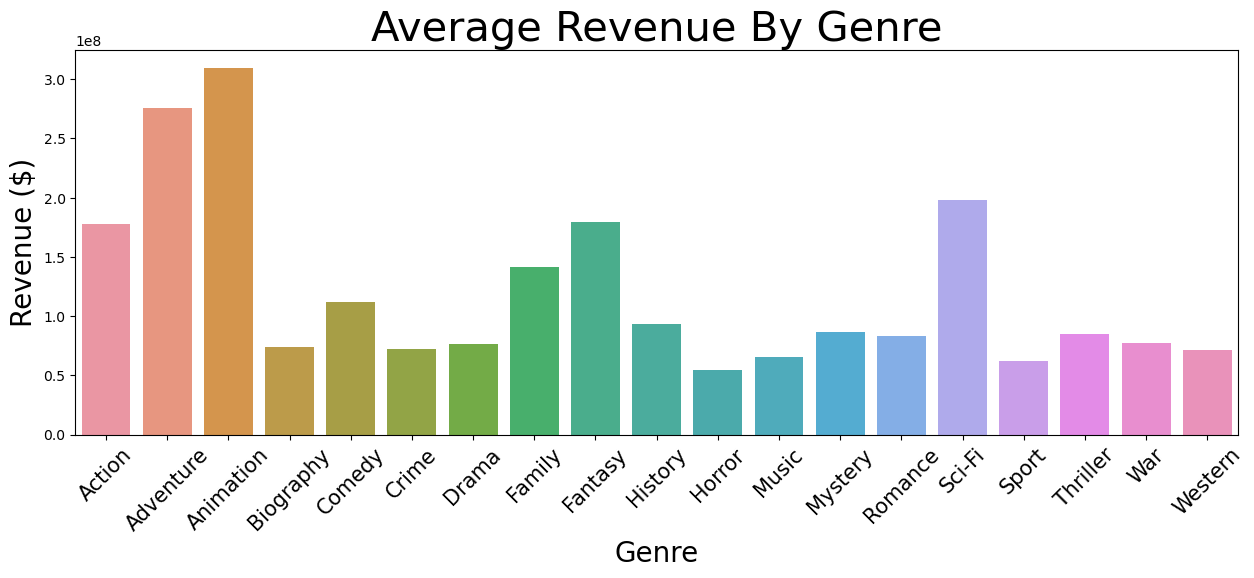

In [48]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores, y = 'Avg_Revenue', x = 'Genre');

plt.title("Average Revenue By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("Revenue ($)", size = 20)
plt.xticks(size = 15, rotation = 45);



**Insight:** The bar chart reveals that Animation and Adventure genres lead in average revenue, followed closely by Sci-Fi. These genres typically benefit from a global audience, franchise opportunities, and high production values. On the other hand, genres like Biography, Horror, and Western generate comparatively lower revenue, reflecting more niche or regional appeal. This insight underscores the financial potential of specific genres, aiding strategic decisions for producers and investors when targeting global markets.

## Question 14: How does the average return on investment (ROI) vary across different genres, and which genres yield the highest profitability?

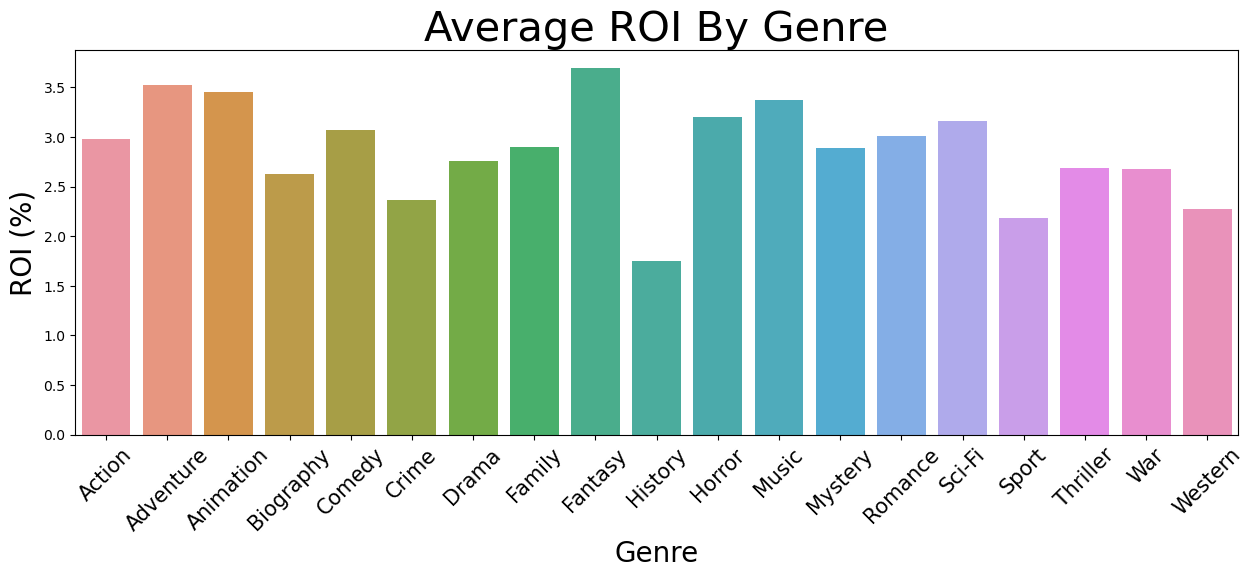

In [49]:
plt.figure(figsize = (15, 5))

sns.barplot(data = imdb_scores, y = 'roi', x = 'Genre');

plt.title("Average ROI By Genre", size = 30)
plt.xlabel("Genre", size = 20)
plt.ylabel("ROI (%)", size = 20)
plt.xticks(size = 15, rotation = 45);



**Insight:** The bar chart highlights that genres like Fantasy, Horror, and Animation achieve the highest average ROI, suggesting that these genres offer substantial profitability relative to their production costs. Conversely, genres like History and War tend to have lower ROIs, indicating higher costs with less proportional returns. This insight suggests that producers and investors aiming for higher profitability should consider focusing on genres with proven ROI potential, while balancing creative and financial considerations.

## Question 15: How does IMDb score relate to movie revenue, and what role does budget play in this relationship?

Text(0, 0.5, 'IMDb Score')

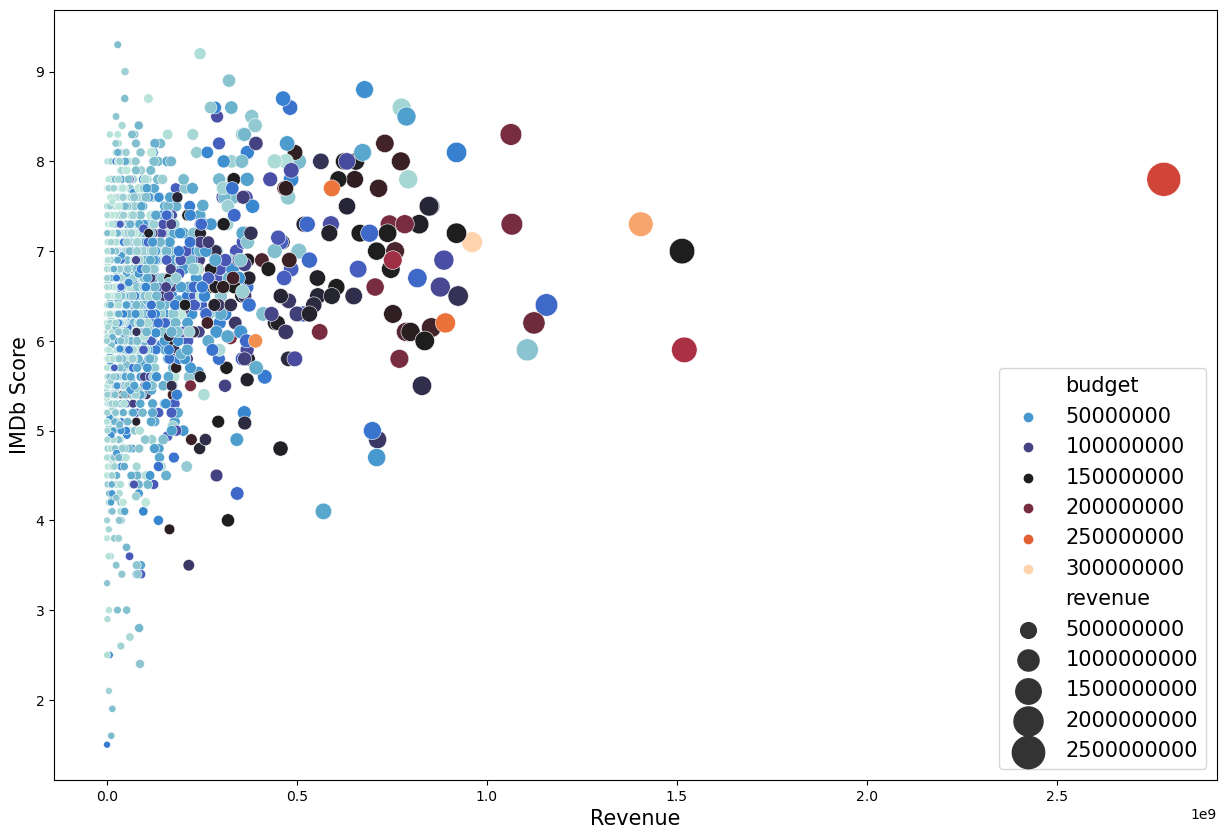

In [50]:
plt.figure(figsize= (15, 10));

sns.scatterplot(data = revenue_df, x="revenue", y="imdb_score", 
                hue = 'budget', size = 'revenue', sizes = (25, 600), 
                palette = 'icefire') # icefire / ocean

plt.legend(loc = 'best', fontsize = 15)

plt.xlabel("Revenue", size = 15)
plt.ylabel("IMDb Score", size = 15)

**Insight:** The scatter plot shows a weak positive correlation between IMDb scores and revenue, indicating that while higher-rated movies often generate more revenue, exceptions exist. Larger budget movies (represented by larger, darker points) tend to cluster around both higher revenues and IMDb scores, highlighting the influence of financial resources on production quality and market reach. However, some lower-budget movies also achieve high scores and decent revenue, reflecting the potential of creative storytelling and niche appeal in driving success.

# Machine Learning tecniques for advanced Insights

In [51]:
from pyspark.sql import SparkSession
import pyspark.pandas as ps  # pandas-on-Spark

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Read CSV from GCS") \
    .getOrCreate()

# Path to the GCS file
bucket_name = "qst-aru/Big-Data-Analytics-for-Business/Team1/data/"
file_name = "revenue_df.csv"
gcs_path = f"gs://{bucket_name}{file_name}"

# Read CSV into Spark DataFrame
revenue_df = spark.read.csv(gcs_path, header=True, inferSchema=True)

# Convert to pandas-on-Spark DataFrame
df_pandas_on_spark = ps.DataFrame(revenue_df)

# Show the pandas-on-Spark DataFrame
print(df_pandas_on_spark.head())


24/12/03 21:02:01 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/12/03 21:02:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


                  movie_title  year                                                     tagline                                                                                                                                                                                                                        plot                                                                                                                                                                                                                                                                 cast duration Action Adventure Animation Biography Comedy Crime Drama Family Fantasy History Horror Music Musical  Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  total_votes  us_voters_votes     votes  votes_1  votes_2  votes_3  votes_4  votes_5  votes_6   votes_7   votes_8  votes_9  votes_10  popularity  director_score  actor_score  actress_score  tagline_sentiment  plot_sentiment  imdb_score  profitable      budg

RANDOM FOREST ON REVENUE


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [53]:
revenue_df.columns


['movie_title',
 'year',
 'tagline',
 'plot',
 'cast',
 'duration',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'total_votes',
 'us_voters_votes',
 'votes',
 'votes_1',
 'votes_2',
 'votes_3',
 'votes_4',
 'votes_5',
 'votes_6',
 'votes_7',
 'votes_8',
 'votes_9',
 'votes_10',
 'popularity',
 'director_score',
 'actor_score',
 'actress_score',
 'tagline_sentiment',
 'plot_sentiment',
 'imdb_score',
 'profitable',
 'budget',
 'revenue',
 'budget_adj',
 'revenue_adj']

# RANDOM FOREST REGRESSION

In [54]:
features = ['year', 'duration', 'Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 
            'Horror',  'Musical', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'us_voters_votes',  'votes_2',
            'votes_3', 'votes_4', 'votes_6', 'votes_7', 'votes_8', 'votes_9', 'votes_10', 'popularity', 'director_score', 
            'actor_score', 'tagline_sentiment', 'plot_sentiment', 'imdb_score', 'profitable']

In [55]:
# Convert the PySpark DataFrame to a Pandas DataFrame
revenue_df_pandas = revenue_df.toPandas()

# Define features and target using the Pandas DataFrame
X = revenue_df_pandas[features]
y = revenue_df_pandas['revenue']


In [56]:
# Ensure all features are numeric (handle categorical features if necessary)
X = pd.get_dummies(X, drop_first=True)  # Converts categorical to numeric if any


In [57]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
rf = RandomForestRegressor()

In [59]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
print("Training Score:", rf.score(X_train, y_train))
print(" ")
print("Testing Score:", rf.score(X_test, y_test))

Training Score: 0.9480048273169411
 
Testing Score: 0.7004667907104204


In [61]:
print("Cross Val Score:", cross_val_score(rf, X_train, y_train, cv = 5).mean())

Cross Val Score: 0.6196369434684804


In [62]:
predictions = rf.predict(X_train)

residuals = y_train - predictions

rss = (residuals ** 2).sum()

mse = metrics.mean_squared_error(y_train, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions))

null_predictions = np.zeros_like(y_test)

null_pred = null_predictions + y_test.mean()

baseline = metrics.mean_squared_error(y_test, null_pred, squared = False)

print("Baseline RMSE:", baseline)
print(" ")
print("RMSE:", rmse)
print("________________________________")
print(" ")
print("Difference:", baseline - rmse)

Baseline RMSE: 151503333.8780451
 
RMSE: 42569408.00453088
________________________________
 
Difference: 108933925.87351424


In [63]:
predictions = rf.predict(X)

In [64]:
# Use the pandas DataFrame for predictions and difference calculations
revenue_df_pandas['predictions'] = predictions.astype(int)
revenue_df_pandas['difference'] = revenue_df_pandas['revenue'] - revenue_df_pandas['predictions']

# If you need to convert the pandas DataFrame back to a PySpark DataFrame
revenue_df = spark.createDataFrame(revenue_df_pandas)


In [65]:
# Sort by 'revenue' in descending order and show the top rows
revenue_df.orderBy("revenue", ascending=False).show(5)


+--------------------+----+--------------------+--------------------+--------------------+--------+------+---------+---------+---------+------+-----+-----+------+-------+-------+------+-----+-------+-------+-------+------+-----+--------+---+-------+-----------+---------------+---------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+----------+------------------+------------------+------------------+-----------------+--------------+-----------------+----------+------+-------------+------------+--------------+-----------+------------+
|         movie_title|year|             tagline|                plot|                cast|duration|Action|Adventure|Animation|Biography|Comedy|Crime|Drama|Family|Fantasy|History|Horror|Music|Musical|Mystery|Romance|Sci-Fi|Sport|Thriller|War|Western|total_votes|us_voters_votes|    votes|votes_1|votes_2|votes_3|votes_4|votes_5|votes_6| votes_7| votes_8| votes_9|votes_10|popularity|    director_score|       actor_score|    

# XGBoost

In [66]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 93.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 93.1 MB/s eta 0:00:0000:0100:01


In [67]:
from xgboost import XGBRegressor

In [68]:
xgb = XGBRegressor()

In [69]:
features = ['year', 'duration', 'Action', 'Adventure', 'Animation','Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 
            'Horror',  'Musical', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'us_voters_votes',  'votes_2',
            'votes_3', 'votes_4', 'votes_6', 'votes_7', 'votes_8', 'votes_9', 'votes_10', 'popularity', 'director_score', 
            'actor_score', 'tagline_sentiment', 'plot_sentiment', 'imdb_score', 'profitable']

In [70]:
# Convert the PySpark DataFrame to a Pandas DataFrame
revenue_df_pandas = revenue_df.toPandas()

# Define features and target using the Pandas DataFrame
X = revenue_df_pandas[features]
y = revenue_df_pandas['revenue']


In [71]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [72]:
# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check the data types of all columns to ensure compatibility with XGBoost
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all data to numeric if possible

# Drop any rows with NaN values that may have been introduced during conversion
X = X.dropna()

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
predictions = xgb.predict(X_train)

residuals = y_train - predictions

rss = (residuals ** 2).sum()

mse = metrics.mean_squared_error(y_train, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions))

In [74]:
print("RMSE:", rmse)
print(" ")
print("Training Score:", xgb.score(X_train, y_train))
print(" ")
print("Testing Score:", xgb.score(X_test, y_test))

RMSE: 8612368.046059584
 
Training Score: 0.9979732924386114
 
Testing Score: 0.6621399410647502


In [75]:
null_predictions = np.zeros_like(y_test)

null_pred = null_predictions + y_test.mean()

baseline = metrics.mean_squared_error(y_test, null_pred, squared = False)

In [76]:
print("Baseline RMSE:", baseline)
print(" ")
print("RMSE:", rmse)
print("________________________________")
print(" ")
print("Difference:", baseline - rmse)

Baseline RMSE: 155107155.05754307
 
RMSE: 8612368.046059584
________________________________
 
Difference: 146494787.0114835


# CONCLUSION

The notebook begins with an in-depth **exploratory data analysis (EDA)** using datasets sourced from IMDb, including title_basics, title_ratings, reviews, title_crew, and title_principals. Each dataset offered unique insights into various aspects of movies, such as attributes, audience ratings, and user reviews. The title_basics dataset provided critical information on title, genres, runtime, and release years, forming the backbone for analyzing trends in movie production. The title_ratings dataset, which contained metrics like average ratings and vote counts, proved invaluable for evaluating the popularity and critical reception of films.

However, the analysis also highlighted significant data quality issues, with missing values in key fields such as runtime_minutes, genres, and reviewer_rating. These gaps required careful filtering to maintain the accuracy and reliability of the insights. Notably, the datasets related to crew roles, such as title_crew and title_principals, exhibited high levels of missing data, restricting the exploration of how directors and writers influence movie success. Despite these challenges, the notebook identified title_basics and title_ratings as strong candidates for trend analysis and predictive modeling. The structured approach to cleaning and integrating these datasets laid a solid foundation for understanding audience preferences and industry trends.

In the **machine learning section**, the notebook applied advanced algorithms to predict movie success based on structured datasets. Features such as genres, runtime, and cast/crew attributes were used as input variables, while audience ratings and vote counts served as target metrics. The models employed included Random Forest and XGBoost, showcasing a robust ensemble-based approach for capturing complex relationships in the data.

Preprocessing played a crucial role in preparing the data for modeling. Categorical variables were converted to numerical formats using one-hot encoding, and missing values were handled systematically to ensure compatibility with the algorithms. Feature selection techniques were implemented to reduce dimensionality and improve model performance. The data was split into training and testing sets, with rigorous evaluations conducted using metrics like Root Mean Square Error (RMSE) and accuracy scores. These evaluations demonstrated the predictive capabilities of the models, highlighting their utility in forecasting movie success based on available attributes.

The combination of **EDA and machine learning techniques** yielded several actionable insights. The analysis identified genres and runtime as significant predictors of movie success, while the popularity of cast and crew members also played a critical role. Sentiment analysis of user reviews provided qualitative perspectives, aligning audience feedback with quantitative metrics like IMDb ratings. These findings have direct implications for strategic decision-making in the entertainment industry, particularly in areas such as film production, marketing campaigns, and casting decisions.

Furthermore, the machine learning models offered a framework for predicting movie performance before release, enabling producers and marketers to allocate resources effectively. By understanding trends in audience preferences and critical reception, stakeholders can make data-driven decisions to maximize the appeal and profitability of their projects.

# Challenges

The project encountered several challenges throughout both the exploratory data analysis (EDA) and machine learning phases, primarily related to data quality, integration complexity, and model performance. A significant hurdle was the presence of missing and incomplete data in critical fields such as `runtime_minutes`, `genres`, and `reviewer_rating`, which limited the scope of certain analyses, such as runtime and genre trends or sentiment comparisons with audience ratings. The crew-related datasets, including `title_crew` and `title_principals`, were particularly problematic due to incomplete records for directors, writers, and key cast members, restricting insights into the influence of these roles on movie success. Data integration posed another challenge, as aligning diverse datasets like `revenue_df` and `totalscore_df` required careful preprocessing to resolve mismatches and ensure consistency, especially when dealing with missing or inconsistent revenue figures.

Additionally, the datasets exhibited imbalances in the representation of genres and runtime categories, which introduced potential bias in trend analyses and predictions. Handling textual data for sentiment analysis presented further complexity, as missing or inconsistent `reviewer_rating` entries limited the utility of the `reviews` dataset. Advanced natural language processing techniques, which were outside the scope of this notebook, would be necessary for deeper insights. On the machine learning side, the high dimensionality resulting from one-hot encoding of categorical variables increased computational costs and necessitated feature selection to maintain model efficiency. Moreover, interpreting the results highlighted the challenge of distinguishing correlation from causation, as the analysis identified patterns but could not definitively establish why certain factors drive success.

Despite these challenges, the project effectively mitigated several issues through rigorous preprocessing, filtering, and careful methodological design. However, resolving data quality issues, enhancing text processing capabilities, and exploring causal relationships remain key areas for future improvement to further deepen the analysis and ensure more robust insights.

# Future Directions and Final Outlook

The notebook highlights areas for improvement and future research. Addressing the missing values in crew-related datasets could enhance the understanding of the influence of directors and writers on movie success. Additionally, incorporating advanced natural language processing (NLP) techniques for sentiment analysis could provide deeper insights into audience feedback, revealing nuanced relationships between user reviews and ratings.

Overall, the notebook establishes a comprehensive workflow for analyzing and predicting movie success, combining statistical methods and machine learning techniques. By integrating structured data with qualitative insights, it offers a holistic approach to understanding audience preferences and industry trends. This methodology serves as a foundation for future research and practical applications, supporting strategic decisions in the dynamic world of entertainment.

## Citations

## IMDb Datasets
- IMDb. (n.d.). **IMDb Datasets**. Retrieved from [https://www.imdb.com/interfaces/](https://www.imdb.com/interfaces/)  
  *Data used for analysis, including `title_basics`, `title_ratings`, `reviews`, `title_crew`, and `title_principals`.*

## BigQuery Public Datasets
- Google Cloud. (n.d.). **IMDb: The Internet Movie Database**. Retrieved from [https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/imdb](https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/imdb)  
  *Source of datasets for analysis, including `revenue_df` and `totalscore_df`.*

## PySpark Documentation
- Apache Software Foundation. (n.d.). **PySpark Documentation**. Retrieved from [https://spark.apache.org/docs/latest/api/python/](https://spark.apache.org/docs/latest/api/python/)  
  *Framework used for data cleaning and preprocessing.*

## Scikit-learn Library
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). **Scikit-learn: Machine learning in Python**. *Journal of Machine Learning Research, 12*, 2825–2830. Retrieved from [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
  *Library used for machine learning models, including Random Forest, Extra Trees, AdaBoost, and XGBoost.*
  
## Random Forest Algorithm
- Breiman, L. (2001). **Random Forests**. *Machine Learning, 45*(1), 5–32. Retrieved from [https://doi.org/10.1023/A:1010933404324](https://doi.org/10.1023/A:1010933404324)  
  *Algorithm used for classification and regression tasks, providing robust performance with ensemble learning.*

## XGBoost Documentation
- Chen, T., & Guestrin, C. (2016). **XGBoost: A scalable tree boosting system**. In *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining* (pp. 785–794). Retrieved from [https://xgboost.readthedocs.io/](https://xgboost.readthedocs.io/)  
  *Framework used for advanced machine learning insights.*

## Matplotlib and Seaborn for Visualization
- Hunter, J. D. (2007). **Matplotlib: A 2D graphics environment**. *Computing in Science & Engineering, 9*(3), 90–95.  
- Waskom, M., et al. (2021). **Seaborn: Statistical data visualization**. *Journal of Open Source Software, 6*(60), 3021.  
  *Libraries used for visualizing trends and distributions in data.*

## Pandas for Data Manipulation
- McKinney, W. (2010). **Data structures for statistical computing in Python**. In *Proceedings of the 9th Python in Science Conference* (pp. 51–56).  
  *Library used for data analysis and manipulation.*


# Generative AI disclosure

Assistance with Debugging and Trend Analysis: ChatGPT was used as a supplementary tool, providing quick debugging insights when we were stalled on a specific code issue for an extended period and offering clarity on varying data trends to ensure accuracy in our interpretations. While helpful in these non-essential areas, the primary research, analysis, and execution were carried out through the team’s dedicated efforts and hands-on exploration of the data.